In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
# for the first part, had to ignore the warnings
import warnings
warnings.filterwarnings("ignore")

### Importing the MNIST dataset

In [41]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [42]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [43]:
x_train = x_train.reshape(x_train.shape[0], 28*28)
x_test = x_test.reshape(x_test.shape[0], 28*28)
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [44]:
df = pd.DataFrame(x_train)
df["Output"] = y_train
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,Output
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


# TASK 1

### Calculating the Mean and Standard deviation

In [45]:
mean, std = [], []
vals = df["Output"].unique()
for i in range(len(vals)):
    temp = df[df["Output"] == i]
    temp.drop(["Output"], axis=1, inplace=True)
    m = np.mean(temp)
    s = np.std(temp)
    mean.append(m)
    std.append(s)

### Displaying Mean digits

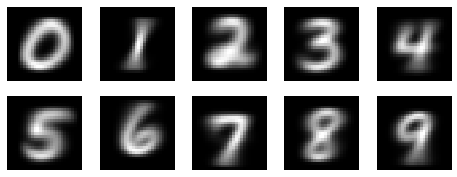

In [46]:
figure, axis = plt.subplots(2, 5, figsize=(8,3))
k=0
for i in range(2):
    for j in range(5):
        axis[i,j].imshow(np.asarray(mean).T[:,k].reshape(28,28), cmap="gray")
        axis[i,j].axis("off")
        k += 1

### Displaying Standard deviation digits

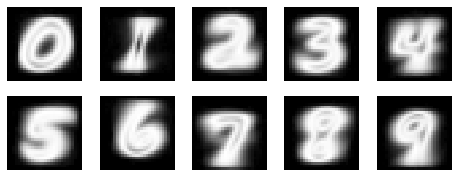

In [47]:
figure, axis = plt.subplots(2, 5, figsize=(8,3))
x = 0
for i in range(2):
    for j in range(5):
        axis[i,j].imshow(np.asarray(std).T[:,x].reshape(28,28), cmap="gray")
        axis[i,j].axis("off")
        x += 1

# TASK 2

### Calculating the Covariance matrix

In [48]:
cov = []
vals = df["Output"].unique()
for i in range(len(vals)):
    temp = df[df["Output"] == i]
    temp.drop(["Output"], axis=1, inplace=True)
    c = np.cov(temp, bias=True, rowvar=False) + np.identity(784)*(0.001)
    cov.append(c)

In [49]:
# np.random.seed(7)
# samples = np.random.randint(0, 10000, size=8)
# samples.sort()
# samples
samples = [50, 100, 200, 500, 1000, 2000, 3500, 5500, 8000, 10000]
prior_prior = [list(df["Output"]).count(i)/len(df["Output"]) for i in range(len(df["Output"].unique()))]
accuracy = []
expected = np.mean(cov, axis=0)
inverse_expected = np.linalg.inv(expected)

### Linear Discriminant Analysis

### 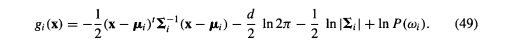

#### The two terms can be ignored and can be treated as additional constants, as they depend on i. Hence we use the simplified equation: 

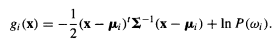

In [50]:
for sample in samples:
    x_range = x_test[:sample]
    y_range = y_test[:sample]
    prediction = []
    for x in x_range:
        lda = []
        for k in range(len(df["Output"].unique())):
            disc_func = -0.5*np.dot(np.dot((x-mean[k]).T, inverse_expected), (x-mean[k]))+np.log(prior_prior[k])
            lda.append(disc_func)
        prediction.append(np.argmax(lda))
    matches = 0
    for j in range(sample):
        if prediction[j]==y_range[j]:
            matches += 1
    accuracy.append((matches/sample)*100)
print("To check the performance, we can compare the accuracies using a plot")
accuracy

To check the performance, we can compare the accuracies using a plot


[86.0,
 88.0,
 89.0,
 85.0,
 84.3,
 83.65,
 83.88571428571429,
 84.34545454545454,
 86.2,
 87.24]

### Plot to check performance

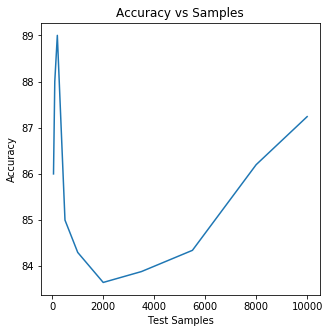

In [51]:
plt.figure(figsize=(5,5))
plt.title("Accuracy vs Samples")
plt.xlabel("Test Samples")
plt.ylabel("Accuracy")
plt.plot(samples, accuracy)

#### We can see that the accuracy varies with the number of samples we use. If the number of samples is less, the accuracy is very high. The accuracy decreases with the increase in the number of samples and in the end, as it trains better, it give a final result of around 87%

# TASK 3

### Fisher's Digits

In [54]:
sw, sb = np.zeros((784,784)), np.zeros((784,784))
m = np.mean(x_train, axis=0)
for i in range(len(df["Output"].unique())):
    temp = df[df["Output"] == i]
    temp.drop(["Output"], axis = 1, inplace = True)
    meann = np.mean(temp)
    tempp = temp.to_numpy()
    si = np.zeros((784,784))
    for x in tempp:
        si += np.dot((x - meann),((x - meann).T))
    sw += si
    s = temp.shape[0]
    sb += s*np.dot((meann - m),(meann - m).T)

In [55]:
sw += np.identity(28*28)*(0.001)
aig = np.linalg.inv(sw).dot(sb)

eig_values, eig_vectors = np.linalg.eig(aig)

### Sorting in descending order, the real part of eigen values and eigen vectors

In [56]:
eig_vectors = eig_vectors.real
eig_values = eig_values.real
eig_vectors = eig_vectors.T

index = np.argsort(abs(eig_values))[::-1]

eig_values = eig_values[index]
eig_vectors = eig_vectors[index]

#### Project the training examples on the eigen vectos

In [57]:
project = np.dot(x_train, eig_vectors[0:9].T)

#### 2-class scatter plot using the first 2 linear discriminants

In [64]:
feat_1 = project[:,0]
feat_2 = project[:,1]

<Figure size 1800x1800 with 0 Axes>

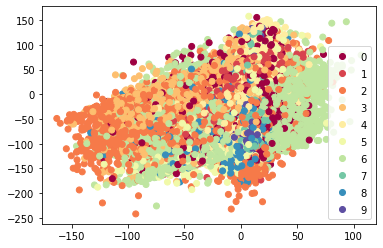

<Figure size 1800x1800 with 0 Axes>

In [67]:
scatter = plt.scatter(feat_1, feat_2, c = y_train, cmap='Spectral')
arg1, arg2 = scatter.legend_elements()
plt.legend(arg1, arg2)
plt.figure(figsize=(25,25))